In [1]:
from cleaning import create_demand
import pandas as pd
import pyomo.environ as pyo
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
nodes = pd.read_pickle("../data/mock/mock_nodes.pkl")
channels = pd.read_pickle("../data/mock/mock_channels.pkl")

In [3]:
nodes.to_csv("../data/mock/mock_nodes.csv")
channels.to_csv("../data/mock/mock_channels.csv")

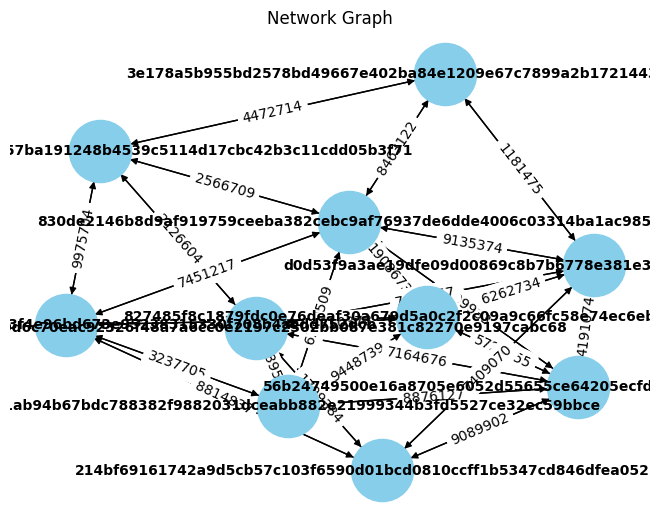

In [5]:
nodes.reset_index(inplace=True)
G = nx.DiGraph()

# Add nodes to the graph
for _, node in nodes.iterrows():
    G.add_node(node['pub_key'], alias=node['alias'])

# Add edges to the graph
for _, edge in channels.iterrows():
    G.add_edge(edge['node1_pub'], edge['node2_pub'], capacity=edge['capacity'], base_fee=edge['base_fee'], perc_fee=edge['rate_fee'])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

# Add edge labels
edge_labels = {(u, v): f"{d['capacity']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Network Graph')
plt.show()
nodes.set_index("pub_key", inplace=True)